In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data Preprocessing

In [30]:
data = pd.read_csv('data.csv')


In [31]:
x_data = data['sqft_living']
y_data = data['price']

In [32]:
x_data
y_data
len(x_data), len(y_data)

(4600, 4600)

In [ ]:
# 80% train, 20% validation : random selection

In [64]:
def train_validation_split(x, y, validation_size=0.2, random_state=None):
    x_validation = x.sample(frac=validation_size, random_state=random_state)
    y_validation = y[x_validation.index]
    
    x_train = x.drop(x_validation.index)
    y_train = y.drop(y_validation.index)

    return np.array(x_train), np.array(y_train), np.array(x_validation), np.array(y_validation)

In [65]:
x_train, y_train, x_validation, y_validation = train_validation_split(x_data, y_data, validation_size=0.2, random_state=10)

In [61]:
x_data.sample(frac=0.2, random_state=15).index

Index([3623, 3698, 2656, 2154, 2384, 1001, 1322,  429, 2528, 1279,
       ...
       3719,  809, 1964,  935, 2626, 3695, 4404, 4328, 1092, 1005],
      dtype='int64', length=920)

In [62]:
y_data[x_data.sample(frac=0.2, random_state=15).index]

3623     325000.000
3698     345000.000
2656     616000.000
2154     546000.000
2384     575000.000
           ...     
3695    1510000.000
4404     268971.875
4328     580000.000
1092     589000.000
1005     765000.000
Name: price, Length: 920, dtype: float64

In [66]:
len(x_validation), len(y_validation)

(920, 920)

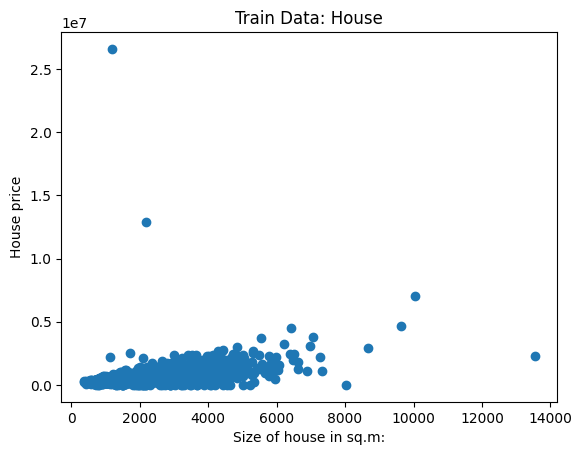

In [33]:
plt.scatter(x_data, y_data)
plt.title("Train Data: House")
plt.xlabel("Size of house in sq.m:")
plt.ylabel("House price")
plt.show()

### Training

In [34]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2

    total_cost = cost / (2 * m)
    return total_cost

In [27]:
#compute_cost(x_train, y_train, w=1.5, b=0)

In [35]:
def compute_gradients(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(0, m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [28]:
#compute_gradients(x_train, y_train, w=10, b=10)

In [36]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    # cost function evolution - loss
    j_history = []

    for i in range(0, num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        j_history.append(cost_function(x, y, w, b))

        print(f"Iteraton: {i} | Cost: {j_history[i]:.4} | dj_dw: {dj_dw:.4}, | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")

    return w, b, j_history

    
    
    

In [72]:
w_init = 0
b_init = 0

iterations = 20
alpha = 1.0e-7

w_final, b_final, j_history = gradient_descent(x=x_data, y=y_data, w_in=w_init, b_in=b_init, alpha=alpha, num_iterations=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(w, b) found by gradient descent {w_final:.4} {b_final:.4}")

Iteraton: 0 | Cost: 1.662e+11 | dj_dw: -1.415e+09, | dj_db: -5.52e+05 | w: 141.5 | b: 0.0552
Iteraton: 1 | Cost: 1.369e+11 | dj_dw: -6.359e+08, | dj_db: -2.493e+05 | w: 205.0 | b: 0.08013
Iteraton: 2 | Cost: 1.31e+11 | dj_dw: -2.859e+08, | dj_db: -1.133e+05 | w: 233.6 | b: 0.09146
Iteraton: 3 | Cost: 1.298e+11 | dj_dw: -1.285e+08, | dj_db: -5.214e+04 | w: 246.5 | b: 0.09667
Iteraton: 4 | Cost: 1.296e+11 | dj_dw: -5.778e+07, | dj_db: -2.464e+04 | w: 252.3 | b: 0.09914
Iteraton: 5 | Cost: 1.295e+11 | dj_dw: -2.598e+07, | dj_db: -1.228e+04 | w: 254.9 | b: 0.1004
Iteraton: 6 | Cost: 1.295e+11 | dj_dw: -1.168e+07, | dj_db: -6.722e+03 | w: 256.0 | b: 0.101
Iteraton: 7 | Cost: 1.295e+11 | dj_dw: -5.25e+06, | dj_db: -4.223e+03 | w: 256.6 | b: 0.1015
Iteraton: 8 | Cost: 1.295e+11 | dj_dw: -2.36e+06, | dj_db: -3.1e+03 | w: 256.8 | b: 0.1018
Iteraton: 9 | Cost: 1.295e+11 | dj_dw: -1.061e+06, | dj_db: -2.595e+03 | w: 256.9 | b: 0.102
Iteraton: 10 | Cost: 1.295e+11 | dj_dw: -4.77e+05, | dj_db: -2.3

In [73]:
j_history

[166228432604.24982,
 136918237992.3409,
 130994451234.87022,
 129797214231.7894,
 129555244609.6496,
 129506340927.04451,
 129496457164.67563,
 129494459589.68318,
 129494055866.01009,
 129493974270.3697,
 129493957778.96378,
 129493954445.56009,
 129493953771.47665,
 129493953634.8598,
 129493953606.86804,
 129493953600.8309,
 129493953599.23027,
 129493953598.52669,
 129493953598.00407,
 129493953597.51823]

### Metrics

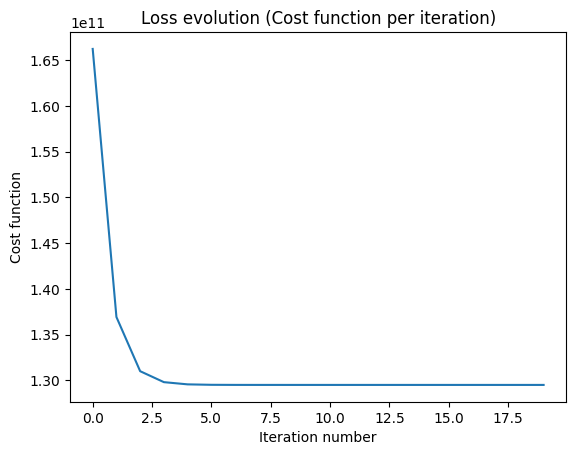

In [74]:
plt.plot(j_history)
plt.title("Loss evolution (Cost function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()

In [75]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denum = np.sum((y - y.mean())**2)

    score = 1 - num / denum
    return score

In [78]:
y_predicted_train = [w_final * i + b_final for i in x_data]

In [79]:
# the greater the r2 score the more correct our prediction is
r2_score(y_data, y_predicted_train) # between 0 and 1.

0.18516381972280105

In [83]:
y_predicted_validation = [w_final * i + b_final for i in x_validation]

In [84]:
r2_score(y_validation, y_predicted_validation)

0.3799913230293931

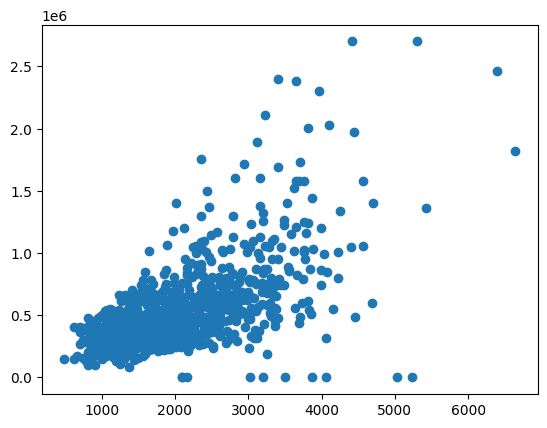

In [85]:
plt.scatter(x_validation, y_validation)

### Prediction

In [ ]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [89]:
size_of_house = 20
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 30
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 50
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")

size_of_house = 60
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 80
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")


size_of_house = 4000
print(f"A house with size(m^2) {size_of_house} has a price of: {w_final * size_of_house + b_final}")



A house with size(m^2) 20 has a price of: 5139.802241037049
A house with size(m^2) 30 has a price of: 7709.651238298571
A house with size(m^2) 50 has a price of: 12849.349232821616
A house with size(m^2) 60 has a price of: 15419.198230083139
A house with size(m^2) 80 has a price of: 20558.896224606186
A house with size(m^2) 4000 has a price of: 1027939.7031511231


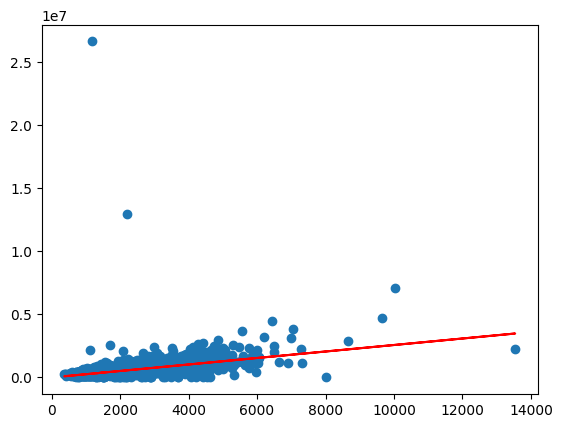

In [86]:
plt.scatter(x_train, y_train)
plt.plot(x_train, w_final * x_train + b_final, c='r')

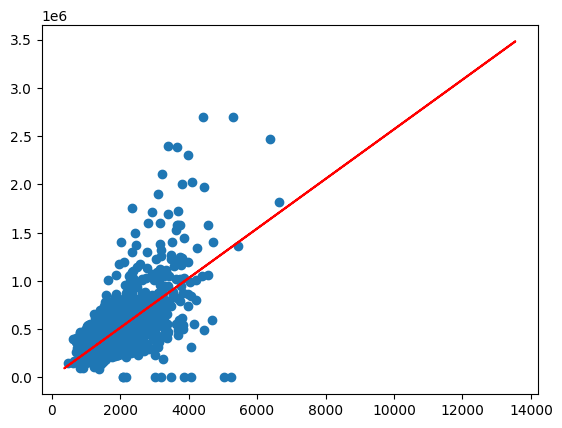

In [87]:
plt.scatter(x_validation, y_validation)
plt.plot(x_train, w_final * x_train + b_final, c='r')